# Project - Machine Learning: Determining Borrower Credit Risk with Multiple Machine Learning Models

**Background and Aim**

We will focus on credit modelling, a well known data science problem that focuses on modeling a borrower's [credit risk](https://en.wikipedia.org/wiki/Credit_risk). Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. We'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/). Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.

Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data (and their own data science process!) and assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back. You can read more about the interest rate that Lending Club assigns [here](https://www.lendingclub.com/loans/personal-loans/rates-fees?). Lending Club also tries to verify each piece of information the borrower provides but it can't always verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is riskier and more unlikely to pay back the loan while a lower interest rate means that the borrower has a good credit history is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a [grade](https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees) according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the [origination fee](https://help.lendingclub.com/hc/en-us/articles/214501207-What-is-the-origination-fee-) that Lending Club charges.

The borrower then makes monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time, however, and some borrowers default on the loan.

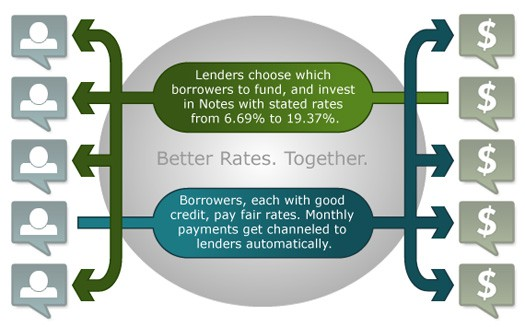

While Lending Club has to be extremely savvy and rigorous with their credit modelling, investors on Lending Club need to be equally as savvy about determining which loans are more likely to be paid off. While at first, you may wonder why investors would put money into anything but low interest loans. The incentive investors have to back higher interest loans is, well, the higher interest! If investors believe the borrower can pay back the loan, even if he or she has a weak financial history, then investors can make more money through the larger additional amount the borrower has to pay.

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. In this project, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time. To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

### Introduction to Data

Lending Club releases data for all of the approved and declined loan applications periodically on their [website](https://www.lendingclub.com/auth/login?login_url=%2Fstatistics%2Fadditional-statistics%3F). We can select a few different year ranges to download the datasets (in CSV format) for both approved and declined loans.

We'll also find a data dictionary (in XLS format) which contains information on the different column names towards the bottom of the page. We can download the data dictionary to refer to it whenever we want to learn more about what a column represents in the datasets. Here's a link to the data dictionary file hosted on [Google Drive](https://docs.google.com/spreadsheets/d/191B2yJ4H1ZPXq0_ByhUgWMFZOYem5jFz0Y3by_7YBY4/edit#gid=2081333097).

First, let's get familiar with the data dictionary. The **LoanStats** sheet describes the approved loans datasets and the **RejectStats** describes the rejected loans datasets. Since rejected applications don't appear on the Lending Club marketplace and aren't available for investment, we'll be focusing on data on approved loans only.

### Problem Statement

The approved loans datasets contain information on current loans, completed loans, and defaulted loans. Let's now define the problem statement for this machine learning project:

**Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?**

Before we can start doing machine learning, we need to define what features we want to use and which column represents the target column we want to predict. Let's start by reading in the dataset and exploring it.

## Step-I: Data Cleaning

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
loans_2007 = pd.read_csv('loans_2007.csv')
loans_2007.drop_duplicates() # Return DataFrame with duplicate rows removed.


C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,NaN,< 1 year,RENT,110000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,other,Car repair bill,100xx,NY,10.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.00,0.00,2904.498829,258.82,2525.00,379.50,0.00,0.00,0.00,Jun-2010,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,NaN,< 1 year,NONE,NaN,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,other,Buying a car,100xx,NY,4.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.00,0.00,7373.904962,0.00,6500.00,873.90,0.00,0.00,0.00,Jun-2010,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,Homemaker,10+ years,MORTGAGE,70000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,other,Aroundthehouse,068xx,CT,8.81,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.00,0.00,5619.762090,0.00,5000.00,619.76,0.00,0.00,0.00,Jun-2010,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 471701350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

### Grouping the Columns-I: First Group

The Dataframe contains many columns and can be cumbersome to try to explore all at once. Let's break up the columns into 3 groups of 18 columns and use the data dictionary to become familiar with what each column represents. As we understand each feature, we want to pay attention to any features that:

- leak information from the future (after the loan has already been funded)
- don't affect a borrower's ability to pay back a loan (e.g. a randomly generated ID value by Lending Club)
- formatted poorly and need to be cleaned up
- require more data or a lot of processing to turn into a useful feature
- contain redundant information

We need to especially pay attention to data leakage, since it can cause our model to overfit. This is because the model would be using data about the target column that wouldn't be available when we're using the model on future loans.

Initially, we will focus on just the columns that we need to remove from consideration. Then, we will come back and further anallyze the columns we decided to keep.

To make this process easier, we will use a table that contains the name, data type, first row's value, and description from the data dictionary for the first 18 columns:

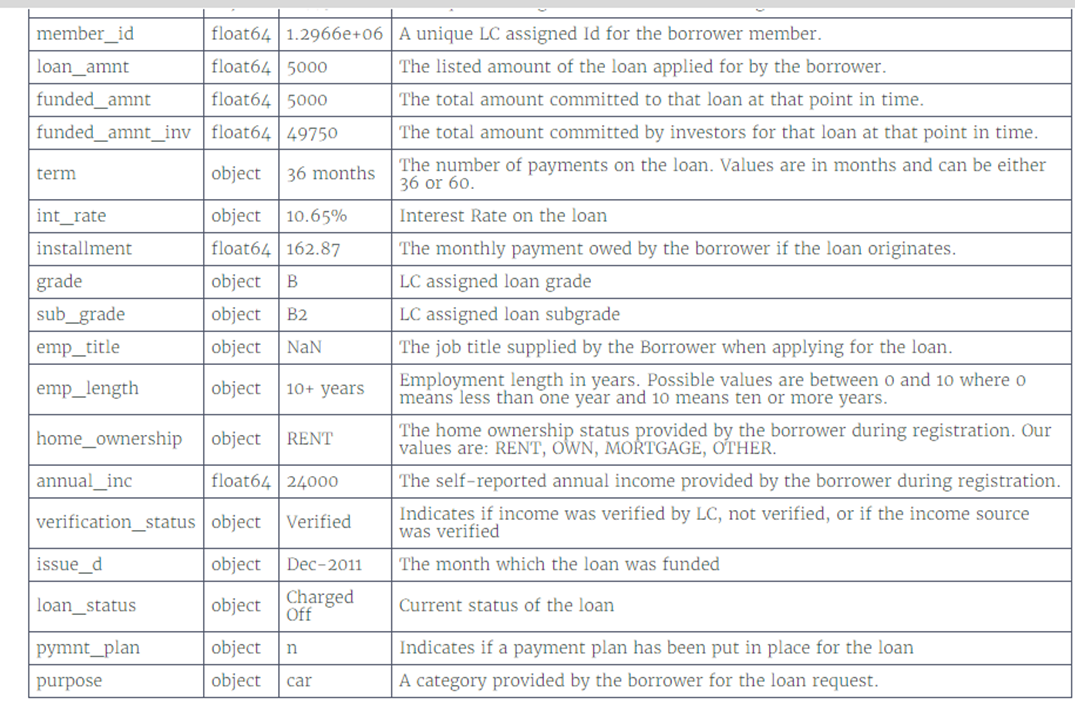

After analyzing each column, we can conclude that the following features need to be removed:

`id`: randomly generated field by Lending Club for unique identification purposes only

`member_id`: also a randomly generated field by Lending Club for unique identification purposes only

`funded_amnt`: leaks data from the future (after the loan is already started to be funded)

`funded_amnt_inv`: also leaks data from the future (after the loan is already started to be funded)

`grade`: contains redundant information as the interest rate column (int_rate)

`sub_grade`: also contains redundant information as the interest rate column (int_rate)

`emp_title`: requires other data and a lot of processing to potentially be useful

`issue_d`: leaks data from the future (after the loan is already completely funded)

We should keep in mind that Lending Club assigns a `grade` and a `sub-grade` based on the borrower's interest rate. While the `grade` and `sub_grade` values are categorical, the `int_rate` column contains continuous values, which are better suited for machine learning.

We will now drop these columns from the Dataframe before moving onto the next group of columns.

In [4]:
loans_2007 = loans_2007.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", 
                              "sub_grade", "emp_title", "issue_d"], axis=1)

In [5]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  zip_code                    42535 non-null  object 
 13  addr_state                  425

### Grouping the Columns-II: Second Group

We will now consider the next group of 18 columns:

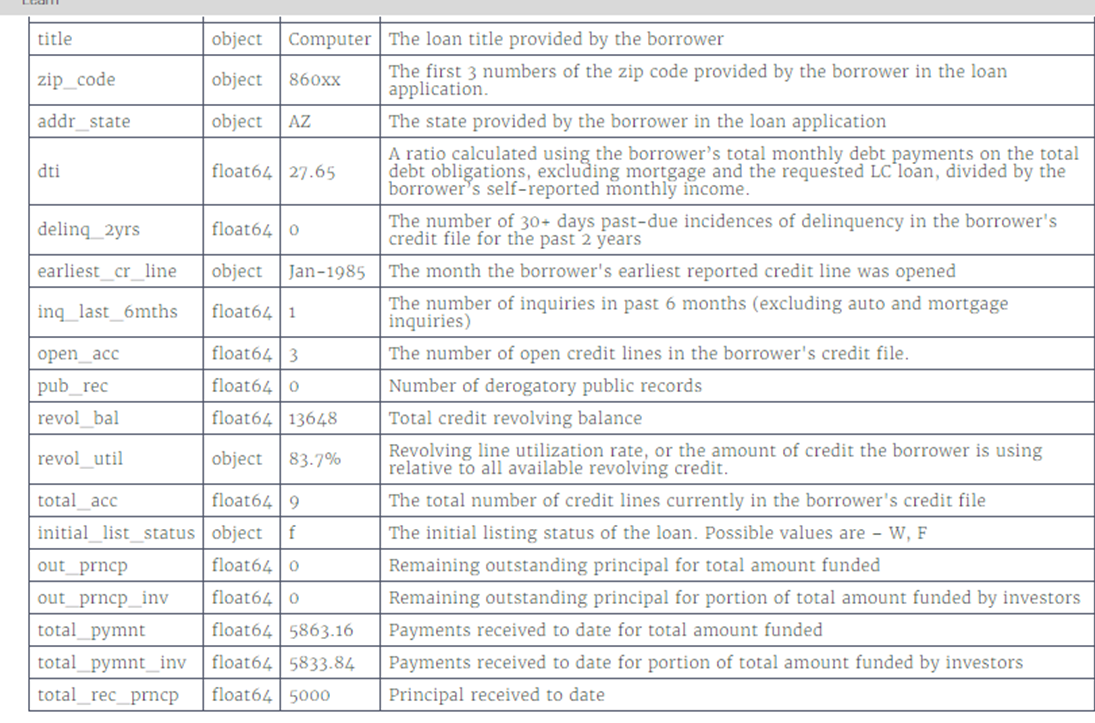

Within this group of columns, we need to drop the following columns:

`zip_code`: redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible (which only can be used to identify the state the borrower lives in)

`out_prncp`: leaks data from the future, (after the loan already started to be paid off)

`out_prncp_inv`: also leaks data from the future, (after the loan already started to be paid off)

`total_pymnt`: also leaks data from the future, (after the loan already started to be paid off)

`total_pymnt_inv`: also leaks data from the future, (after the loan already started to be paid off)

`total_rec_prncp`: also leaks data from the future, (after the loan already started to be paid off)

The `out_prncp` and `out_prncp_inv` both describe the outstanding principal amount for a loan, which is the remaining amount the borrower still owes. These 2 columns as well as the total_pymnt column describe properties of the loan after it's fully funded and started to be paid off. This information isn't available to an investor before the loan is fully funded and we don't want to include it in our model.

We will remove these columns from the Dataframe.

In [6]:
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", 
                              "total_rec_prncp"], axis=1)

In [7]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

### Grouping the Columns-III: Third Group

We will now consider the last group of 18 columns. 
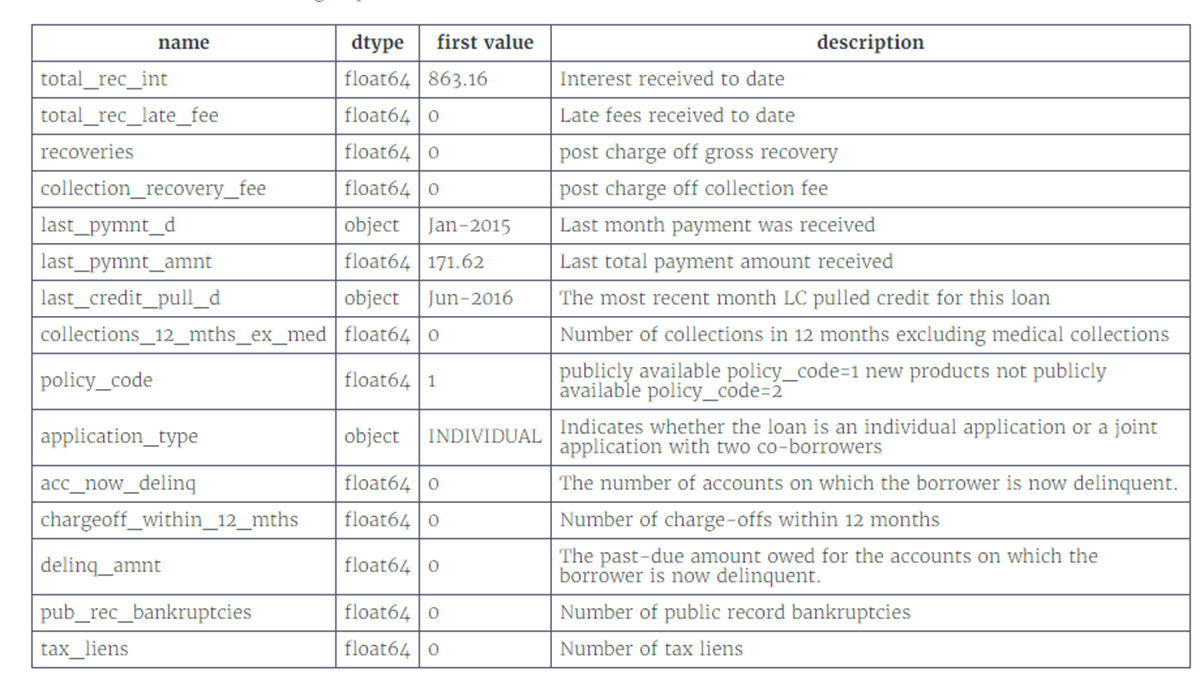

In the last group of columns, we need to drop the following columns:

`total_rec_int`: leaks data from the future, (after the loan already started to be paid off),

`total_rec_late_fee`: also leaks data from the future, (after the loan already started to be paid off),

`recoveries`: also leaks data from the future, (after the loan already started to be paid off),

`collection_recovery_fee`: also leaks data from the future, (after the loan already started to be paid off),

`last_pymnt_d`: also leaks data from the future, (after the loan already started to be paid off),

`last_pymnt_amnt`: also leaks data from the future, (after the loan already started to be paid off).

All of these columns leak data from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

In [8]:
loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
                              "last_pymnt_d", "last_pymnt_amnt"], axis=1)

In [9]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   term                        42535 non-null  object 
 2   int_rate                    42535 non-null  object 
 3   installment                 42535 non-null  float64
 4   emp_length                  41423 non-null  object 
 5   home_ownership              42535 non-null  object 
 6   annual_inc                  42531 non-null  float64
 7   verification_status         42535 non-null  object 
 8   loan_status                 42535 non-null  object 
 9   pymnt_plan                  42535 non-null  object 
 10  purpose                     42535 non-null  object 
 11  title                       42522 non-null  object 
 12  addr_state                  42535 non-null  object 
 13  dti                         425

### Target Column
Above, we were able to reduce the number of columns from 52 to 32 columns. We now need to decide on a target column that we want to use for modeling.

We should use the `loan_status` column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. Currently, this column contains text values and we need to convert it to a numerical one for training a model. We will now explore the different values in this column using pandas function `value_counts()` and come up with a strategy for converting the values in this column.

In [10]:
print(loans_2007['loan_status'].value_counts())

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64


### Binary Classification

There are 8 different possible values for the `loan_status` column. We can read about most of the different loan statuses on the [Lending Clube webste](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-). The two values that start with **"Does not meet the credit policy"** aren't explained unfortunately. A quick Google search takes us to explanations from the lending community [here](https://forum.lendacademy.com/?topic=2427.msg20813#msg20813).

We've compiled the explanation for each column as well as the counts in the Dataframe in the following table:
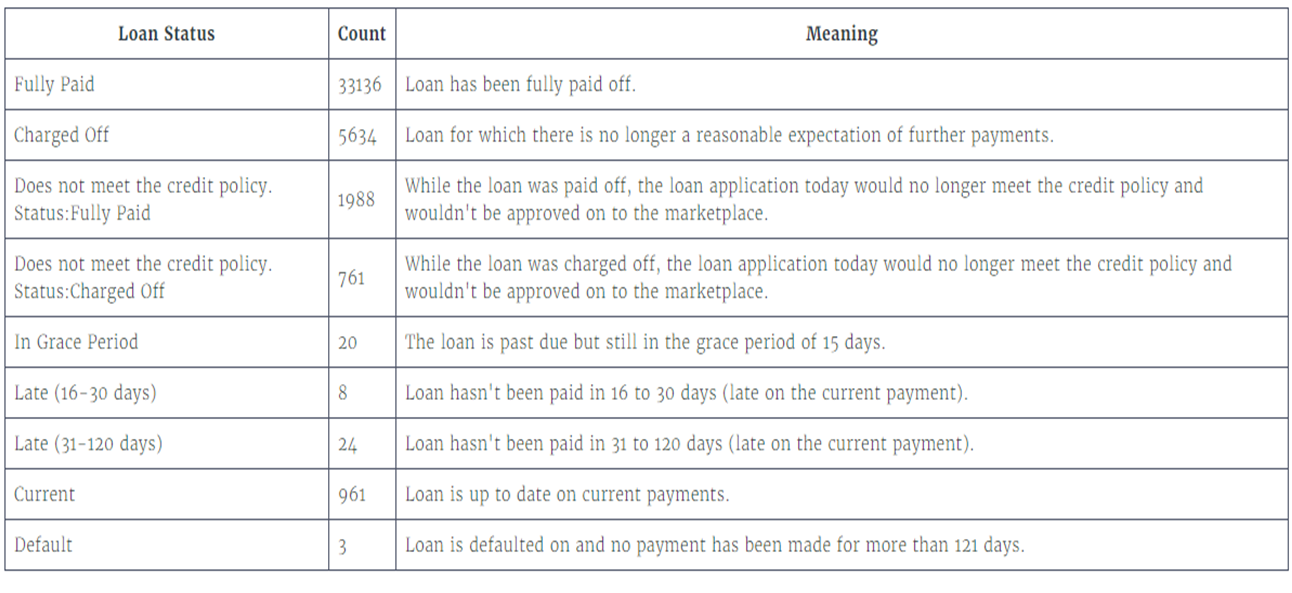

From the investor's perspective, we're interested in trying to predict which loans will be paid off on time and which ones won't be. Only the Fully Paid and `Charged Off` values describe the final outcome of the loan. The other values describe loans that are still ongoing and where the jury is still out on if the borrower will pay back the loan on time or not. While the `Default` status resembles the `Charged Off` status, in Lending Club's eyes, loans that are charged off have essentially no chance of being repaid while default ones have a small chance. You can read about the difference here.

Since we're interested in being able to predict which of these `2` values a loan will fall under, we can treat the problem as a binary classification one. We will remove all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status and then transform the `Fully Paid` values to `1` for the positive case and the `Charged Off` values to `0` for the negative case. 
While there are a few different ways to transform all of the values in a column (`loc`, `iloc`), we'll use the Dataframe method [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html). According to the documentation, we can pass the replace method a nested mapping dictionary in the following format:

**For a DataFrame a dict can specify that different values should be replaced in different columns. For example, `{'a': 1, 'b': 'z'}` looks for the value `1` in column ‘a’ and the value `‘z’` in column ‘b’ and replaces these values with whatever is specified in `value`.**

or 
**For example, {'a': 'b', 'y': 'z'} replaces the value `‘a’` with `‘b’` and `‘y’` with `‘z’`. To use a dict in this way the `value` parameter should be None.**

or 

**For a DataFrame nested dictionaries, e.g., `{'a': {'b': np.nan}}`, are read as follows: look in column `‘a’` for the value `‘b’` and replace it with `NaN`. The value parameter should be None to use a nested dict in this way. We can nest regular expressions as well. Column names (the top-level dictionary keys in a nested dictionary) cannot be regular expressions.** 

```
mapping_dict = {
    "date": {
        "january": 1,
        "february": 2,
        "march": 3
    }
}
df = df.replace(mapping_dict)

```

one thing we need to keep in mind is the class imbalance between the positive and negative cases. While there are 33,136 loans that have been fully paid off, there are only 5,634 that were charged off. This class imbalance is a common problem in binary classification and during training, the model ends up having a strong bias towards predicting the class with more observations in the training set and will rarely predict the class with less observations. The stronger the imbalance, the more biased the model becomes. There are a few different ways to tackle this class imbalance, which we'll tackle later.

In [11]:
# Apply Boolean logic to keep only fully paid and charged off entries(rows)
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

# Mapping Dictionary
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace) # value parameter is none by default

### Removing Single Value Columns

Now, we will look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns we'll need to explore further.

We'll need to compute the number of unique values in each column and drop the columns that contain only one unique value. While the Series method `unique` returns the unique values in a column, it also counts the Pandas missing value object `nan` as a value:
```
# Returns 0 and nan.
unique_values = loans['tax_liens'].unique()
```
Since we're trying to find columns that contain one true unique value, we should first drop the null values then compute the number of unique values:
```
non_null = loans_2007['tax_liens'].dropna()
unique_non_null = non_null.unique()
num_true_unique = len(unique_non_null)
```

In [12]:
# All Columns
orig_columns = loans_2007.columns
# Empty list to contain columns which will be dropped
drop_columns = []
# 
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
#  Drop all columns in drop_columns list        
filtered_loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


## Sec-II: Preparing the Features

Above, we removed all of the columns that contained redundant information, weren't useful for modeling, required too much processing to make useful, or leaked information from the future. We've exported the Dataframe from above to a CSV file named `filtered_loans_2007.csv` to differentiate the file with the `loans_2007.csv` we used above. Now, we'll prepare the data for machine learning by focusing on handling missing values, converting categorical columns to numeric columns, and removing any other extraneous columns we encounter throughout this process.

This is because the mathematics underlying most machine learning models assumes that the data is numerical and contains no missing values. To reinforce this requirement, scikit-learn will return an error if you try to train a model using data that contain missing values or non-numeric values when working with models like linear regression and logistic regression.

We can return the number of missing values across the Dataframe by:

- first using the Pandas Dataframe method `isnull` to return a Dataframe containing Boolean values:
- `True` if the original value is null,
- `False` if the original value isn't null.
- then using the Pandas Dataframe method `sum` to calculate the number of null values in each column.



In [13]:
loans = pd.read_csv('filtered_loans_2007.csv')
null_counts = loans.isnull().sum()
print(null_counts[null_counts>0])

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


### Handling Missing Values

Above, we got a series displaying how many missing values each column with missing values has. While most of the columns have no missing values, two columns have fifty or less rows with missing values, and two columns, `emp_length` and `pub_rec_bankruptcies`, contain a relatively high amount of missing values.

Domain knowledge tells us that employment length is frequently used in assessing how risky a potential borrower is, so we'll keep this column despite its relatively large amount of missing values. 

Let's inspect the values of the column pub_rec_bankruptcies.

In [14]:
print(loans.pub_rec_bankruptcies.value_counts(normalize=True, dropna=False))

0.0    0.939438
1.0    0.042456
NaN    0.017978
2.0    0.000129
Name: pub_rec_bankruptcies, dtype: float64


Above column offers very little variability, nearly 94% of values are in the same category. It probably won't have much predictive value. Let's drop it. In addition, we'll remove the remaining rows containing null values.

This means that we'll keep the following columns and just remove rows containing missing values for them:

`emp_length`
`title`
`revol_util`
`last_credit_pull_d`
and drop the `pub_rec_bankruptcies` column entirely.

We will remove the `pub_rec_bankruptcies` column first, then removing all rows containing any missing values at all to cover both of these cases. This way, we only remove the rows containing missing values for the `emp_length`, `title` and `revol_util` columns, but not the `pub_rec_bankruptcies` column.

Below, we will:

- Use the `drop` method to remove the pub_rec_bankruptcies column from loans.
- Use the `dropna` method to remove all rows from loans containing any missing values.
- Use the `dtypes` attribute followed by the `value_counts()` method to return the counts for each column data type. 
- Use the `print` function to display these counts.

In [15]:
loans = loans.drop("pub_rec_bankruptcies", axis=1)
loans = loans.dropna(axis=0)
print(loans.dtypes.value_counts())

object     11
float64    10
int64       1
dtype: int64


### Text Columns

While the numerical columns can be used natively with scikit-learn, the object columns that contain text need to be converted to numerical data types. We will return a new Dataframe containing just the object columns so we can explore them in more depth. We will use the Dataframe method `select_dtypes` to select only the columns of a type `object`. 

In [16]:
object_columns_df = loans.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Jun-2016
Name: 0, dtype: object


### Converting Text Columns

Some of the columns seem like they represent categorical values, but we have to confirm by checking the number of unique values in those columns:

`home_ownership`: home ownership status, can only be 1 of 4 categorical values according to the data dictionary,

`verification_status`: indicates if income was verified by Lending Club,

`emp_length`: number of years the borrower was employed upon time of application,

`term`: number of payments on the loan, either 36 or 60,

`addr_state`: borrower's state of residence,

`purpose`: a category provided by the borrower for the loan request,

`title`: loan title provided by the borrower,

There are also some columns that represent numeric values, that need to be converted:

`int_rate`: interest rate of the loan in %,

`revol_util`: revolving line utilization rate or the amount of credit the borrower is using relative to all available credit

Based on the first row's values for purpose and title, it seems like these columns could reflect the same information. We will explore the unique value counts separately to confirm if this is true.

Lastly, some of the columns contain date values that would require a good amount of feature engineering for them to be potentially useful:

`earliest_cr_line`: The month the borrower's earliest reported credit line was opened,

`last_credit_pull_d`: The most recent month Lending Club pulled credit for this loan.

Since these date features require some feature engineering for modeling purposes, we will remove these date columns from the Dataframe.

Below, we will:

- Display the unique value counts for the following columns: `home_ownership`, `verification_status`, `emp_length`, `term`, `addr_state` columns:

- Store these column names in a list named `cols`.
- Use a for loop to iterate over `cols`:
- Use the `print` function combined with the Series method `value_counts` to display each column's unique value counts.

In [17]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans[c].value_counts())

RENT        18112
MORTGAGE    16686
OWN          2778
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16281
Verified           11856
Source Verified     9538
Name: verification_status, dtype: int64
10+ years    8545
< 1 year     4513
2 years      4303
3 years      4022
4 years      3353
5 years      3202
1 year       3176
6 years      2177
7 years      1714
8 years      1442
9 years      1228
Name: emp_length, dtype: int64
 36 months    28234
 60 months     9441
Name: term, dtype: int64
CA    6776
NY    3614
FL    2704
TX    2613
NJ    1776
IL    1447
PA    1442
VA    1347
GA    1323
MA    1272
OH    1149
MD    1008
AZ     807
WA     788
CO     748
NC     729
CT     711
MI     678
MO     648
MN     581
NV     466
SC     454
WI     427
OR     422
AL     420
LA     420
KY     311
OK     285
UT     249
KS     249
AR     229
DC     209
RI     194
NM     180
WV     164
HI     162
NH     157
DE     110
MT      77
WY      76
AK      76
SD      60
VT  

### Reason for the Loan
First, We'll look at the unique value counts for the purpose and title columns to understand which column we want to keep.

In [18]:
print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

Debt Consolidation                       2068
Debt Consolidation Loan                  1599
Personal Loan                             624
Consolidation                             488
debt consolidation                        466
                                         ... 
Paying off High Interest Credit Cards       1
Wife-Master's Degree                        1
Material and equipment                      1
home free                                   1
horse trailer                               1
Name: title, Length: 18881, dtype: int64
debt_consolidation    17751
credit_card            4911
other                  3711
home_improvement       2808
major_purchase         2083
small_business         1719
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             312
renewable_energy         94
Name: purpose, dtype: int64


### Categorical Columns

The `home_ownership`, `verification_status`, `emp_length`, `term`, and `addr_state` columns all contain multiple discrete values. And all except `addr_state` each contain a few discrete categorical values. We will encode these columns as dummy variables and keep them. We will also clean the `emp_length` column and treat it as a numerical one since the values have ordering (`2` years of employment is less than `8` years).

We will use the following mapping to clean the `emp_length` column:

"10+ years": `10`

"9 years": `9`

"8 years": `8`

"7 years": `7`

"6 years": `6`

"5 years": `5`

"4 years": `4`

"3 years": `3`

"2 years": `2`

"1 year": `1`

"< 1 year": `0`

"n/a": `0`

Above we have assumed that people who may have been working more than 10 years have only really worked for `10` years. We also assume that people who've worked less than a year or if the information is not available that they've worked for 0. This is a general heuristic but it's not perfect.

Also, the `addr_state` column contains many discrete values and we'd need to add 49 dummy variable columns to use it for classification. This would make our Dataframe much larger and could slow down how quickly the code runs. We will remove this column from consideration.

Below, we will:

- Remove the `last_credit_pull_d`, `addr_state`, `title`, and `earliest_cr_line` columns from loans.
- Convert the `int_rate` and `revol_util` columns to float columns by:
- Using the str accessor followed by the `rstrip` string method to strip the right trailing percent sign (`%`):
  `loans['int_rate'].str.rstrip('%')` returns a new Series with `%` stripped from the right side of each value.
 - On the resulting Series object, use the `astype` method to convert to the `float` type.
- Assign the new Series of float values back to the respective columns in the Dataframe.
- Use the replace method to clean the `emp_length` column.

In [19]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans = loans.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
loans = loans.replace(mapping_dict)

### Dummy Variables

We will now encode the `home_ownership`, `verification_status`, purpose, and term columns as dummy variables so we can use them in our model. We first need to use the Pandas `get_dummies` method to return a new Dataframe containing a new column for each dummy variable. Then use the `concat` method to add these dummy columns back to the original Dataframe. And then drop the original columns entirely using the `drop` method.

Below, we will:

- Encode the `home_ownership`, `verification_status`, `purpose`, and `term` columns as `integer` values:
- Use the `get_dummies` function to return a Dataframe containing the dummy columns.
- Use the `concat` method to add these dummy columns back to loans.
- Remove the original, non-dummy columns (`home_ownership`, `verification_status`, `purpose`, and `term`) from `loans`.

In [20]:
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
clean_loans = loans.drop(cat_columns, axis=1)

## Sec-III: Making Predictions

Our eventual goal is to generate features from the data, which can feed into a machine learning algorithm. The algorithm will make predictions about whether or not a loan will be paid off on time, which is contained in the `loan_status` column of the clean dataset. 

As we prepared the data, we removed columns that had data leakage issues, contained redundant information, or required additional processing to turn into useful features. We cleaned features that had formatting issues, and converted categorical columns to dummy variables.

We also noticed that there's a class imbalance in our target column, `loan_status`. There are about `6` times as many loans that were paid off on time (positive case, label of `1`) than those that weren't (negative case, label of `0`). Imbalances can cause issues with many machine learning algorithms, where they appear to have high accuracy, but actually aren't learning from the training data. Because of its potential to cause issues, we need to keep the class imbalance in mind as we build machine learning models.

Above, we ended up with the csv file called `clean_loans_2007.csv`. We will read this file into a Dataframe and view a summary of the work we did.

In [21]:
loans = pd.read_csv("clean_loans_2007.csv")
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37675 entries, 0 to 37674
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37675 non-null  float64
 1   int_rate                             37675 non-null  float64
 2   installment                          37675 non-null  float64
 3   emp_length                           37675 non-null  int64  
 4   annual_inc                           37675 non-null  float64
 5   loan_status                          37675 non-null  int64  
 6   dti                                  37675 non-null  float64
 7   delinq_2yrs                          37675 non-null  float64
 8   inq_last_6mths                       37675 non-null  float64
 9   open_acc                             37675 non-null  float64
 10  pub_rec                              37675 non-null  float64
 11  revol_bal                   

### Picking an Error Metric

Going back to our original problem statement that we wanted to answer:

**Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?**

We established earlier that this is a binary classification problem, and we converted the `loan_status` column to `0s` and `1s` as a result. Before selecting an algorithm to apply to the data, we need to select an error metric.


An error metric will help us figure out when our model is performing well, and when it's performing poorly. To tie error metrics all the way back to the original question we wanted to answer, let's say we're using a machine learning model to predict whether or not we should fund a loan on the Lending Club platform. Our objective in this is to make money -- we want to fund enough loans that are paid off on time to offset our losses from loans that aren't paid off. An error metric will help us determine if our algorithm will make us money or lose us money.

In this case, we're primarily concerned with false positives and false negatives. Both of these are different types of misclassifications. With a false positive, we predict that a loan will be paid off on time, but it actually isn't. This costs us money, since we fund loans that lose us money. With a false negative, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off.

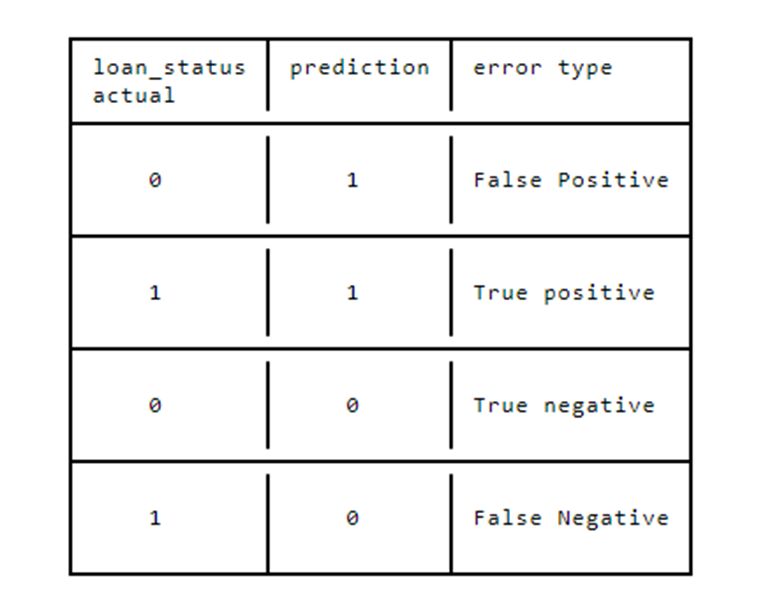

In the loan_status and prediction columns, a `0` means that the loan wouldn't be paid off on time, and a `1` means that it would.

Since we're viewing this problem from the standpoint of a conservative investor, we need to treat false positives differently than false negatives. A conservative investor would want to minimize risk, and avoid false positives as much as possible. They'd be more okay with missing out on opportunities (false negatives) than they would be with funding a risky loan (false positives).

We will calculate false positives and true positives in Python. We can use multiple conditionals, separated by a & to select items in a NumPy array that meet certain conditions.

We can calculate all the above metrics as follows, if predictions are contained in an array `predictions:

```

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

```


### Class Imbalance

We noted earlier that there is a significant class imbalance in the `loan_status` column. There are 6 times as many loans that were paid off on time (`1`), than loans that weren't paid off on time (`0`). This causes a major issue when we use accuracy as a metric. This is because due to the class imbalance, a classifier can predict `1` for every row, and still have high accuracy. Here's a diagram that illustrates the concept:

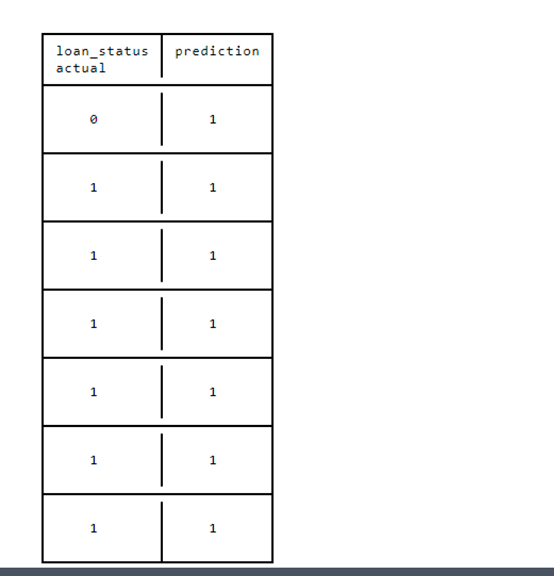

In the above diagram, our predictions are `85.7%` accurate -- we've correctly identified `loan_status` in `85.7%` of cases. However, we've done this by predicting `1` for every row. What this means is that we'll actually lose money. Let's say we loan out `1000 dollars` on average to each borrower. Each borrower pays us `10%` interest back. So we make a projected profit of `100` dollars on each loan. In the above diagram, we'd actually lose money:

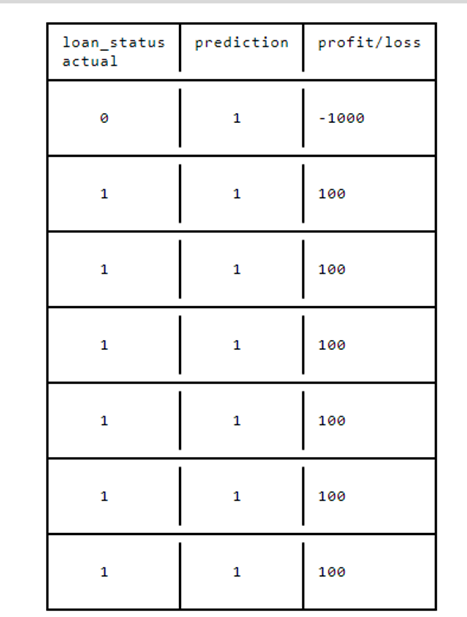

We made `600` dollars in interest from the borrowers that paid us back, but we lost `1000` dollars on the one borrower who never paid us back, so we actually ended up losing `400` dollars overall, even though our model is technically accurate.

This is why it's important to always be aware of imbalanced classes in machine learning models, and to adjust your error metric accordingly. In this case, we don't want to use accuracy, and should instead use metrics that tell us the number of false positives and false negatives.

This means that we should optimize for:

`high recall` (true positive rate)

`low fall-out` (false positive rate)

We can calculate false positive rate and true positive rate, using the numbers of true positives, true negatives, false negatives, and false positives.

False positive rate is the number of false positives divided by the number of false positives plus the number of true negatives. This divides all the cases where we thought a loan would be paid off but it wasn't by all the loans that weren't paid off:

$FPR=\dfrac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$

```
fpr = fp / (fp + tn)
```


True positive rate is the number of true positives divided by the number of true positives plus the number of false negatives. This divides all the cases where we thought a loan would be paid off and it was by all the loans that were paid off:

$TPR=\dfrac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

```
tpr = tp / (tp + fn)
```

In other words:

- False Positive Rate: "the percentage of the loans that shouldn't be funded that I would fund".
- True Positive Rate: "the percentage of loans that should be funded that I would fund".

Generally, if we want to reduce false positive rate, true positive rate will also go down. This is because if we want to reduce the risk of false positives, we wouldn't think about funding riskier loans in the first place.

Below, we will generate an array `predictions` and:

Compute the false positive rate for `predictions`.
- Compute the number of false positives, then divide by the number of false positives plus the number of true negatives.
- Assign to `fpr`.
Compute the true positive rate for predictions.
- Compute the number of true positives, then divide by the number of true positives plus the number of false negatives.
- Assign to `tpr`.
Print out `fpr` and `tpr` to verify.

In [22]:
# Predict that all loans will be paid off on time.
predictions = pd.Series(np.ones(loans.shape[0])) # generates an array of `1s` of size = number of rows in `loans

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

1.0
1.0


### Logistic Regression

Through above mock-up exercise, we noticed that both `fpr` and `tpr` were `1`. This is because we predicted `1` for each row. This means that we correctly identified all of the good loans (true positive rate), but we also incorrectly identified all of the bad loans (false positive rate). Now, we can move on to making predictions using a machine learning algorithm.

Our cleaned dataset contains `41` columns, all of which are either the `int64` or the `float64` data type. There aren't any null values in any of the columns. This means that we can now apply any machine learning algorithm to our dataset. Most algorithms can't deal with non-numeric or missing values, which is why we had to do so much data cleaning.

In order to fit the machine learning models, we'll use the Scikit-learn library. A good first algorithm to apply to binary classification problems is logistic regression, for the following reasons:

- it's quick to train and we can iterate more quickly,
- it's less prone to overfitting than more complex models like decision trees,
- it's easy to interpret.

A comparison of various algorithms is given [here](https://www.datasciencecentral.com/profiles/blogs/comparing-classifiers-decision-trees-knn-naive-bayes). 

Below, we will:

- Create a Dataframe named `features` that contains just the feature columns.
- Remove the `loan_status` column.
- Create a Series named `target` that contains just the target column (loan_status).
- Use the `fit` method of `lr` to fit a logistic regression to `features` and `target`.
- Use the `predict` method of `lr` to make predictions on features. Assign the predictions to` predictions`.

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
cols = loans.columns
train_cols = cols.drop("loan_status")
features = loans[train_cols]
target = loans["loan_status"]
lr.fit(features, target)
predictions = lr.predict(features)
print(predictions.std())
print(predictions.mean())

0.0398752021065766
0.9984074319840743


### Cross Validation

Above predictions are overfit. They are overfit because we generated predictions using the same data that we trained our model on. When we use this to evaluate error, we get an unrealistically high depiction of how accurate the algorithm is, because it already "knows" the correct answers. This is like asking someone to memorize a bunch of physics equations, then asking them to plug numbers into the equations. They can tell you the right answer, but they can't explain a concept that they haven't already memorized an equation for.

In order to get a realistic depiction of the accuracy of the model, we will perform k-fold cross validation. We can use the [cross_val_predict()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function from the sklearn.model_selection package.

Below, we will:

- Generate cross validated predictions for features.
 - Call `cross_val_predict` using `lr`, `features`, and `target`.
 - Set the `cv` parameter to 3, so that 3-fold cross validation is performed.
 - Assign the predictions to `predictions`.

- Use the `Series` class to convert `predictions` to a pandas Series object.
- Compute true positive rate and false positive rate.
 - Assign true positive rate to `tpr`.
 - Assign false positive rate to `fpr`.
 - Display `fpr` and `tpr` to evaluate them.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression(max_iter = 1000)

predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])
# Rates
tpr = tp  / (tp + fn)
fpr = fp  / (fp + tn)
print(tpr)
print(fpr)

0.9986062070247166
0.9955464835776582


### Penalizing the Classifier

We can see from above, our `fpr` and `tpr` are around what we'd expect if the model was predicting all ones. We can look at the first few rows of predictions to confirm:

In [25]:
predictions.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

Even though we're not using accuracy as an error metric, the classifier is, and it isn't accounting for the imbalance in the classes. There are a few ways to get a classifier to correct for imbalanced classes. The two main ways are:

Use oversampling and undersampling to ensure that the classifier gets input that has a balanced number of each class.
Tell the classifier to penalize misclassifications of the less prevalent class more than the other class.

We'll look into `oversampling` and `undersampling` first. They involve taking a sample that contains equal numbers of rows where `loan_status` is `0`, and where `loan_status` is `1`. This way, the classifier is forced to make actual predictions, since predicting all `1s` or all `0s` will only result in 50% accuracy at most.

The downside of this technique is that since it has to preserve an equal ratio, we have to either:

- Throw out many rows of data. If we wanted equal numbers of rows where loan_status is `0` and where loan_status is `1`, one way we could do that is to delete rows where loan_status is `1`.
- Copy rows multiple times. One way to equalize the `0s` and `1s` is to copy rows where loan_status is `0`.
- Generate fake data. One way to equalize the `0s` and `1s` is to generate new rows where loan_status is `0`.

Unfortunately, none of these techniques are especially easy. The second method we mentioned earlier, telling the classifier to penalize certain rows more, is actually much easier to implement using scikit-learn.

We can do this by setting the `class_weight` parameter to `balanced` when creating the `LogisticRegression` instance. This tells scikit-learn to penalize the misclassification of the minority class during the training process. The penalty means that the logistic regression classifier pays more attention to correctly classifying rows where loan_status is `0`. This lowers accuracy when `loan_status` is `1`, but raises accuracy when `loan_status` is `0`.

By setting the `class_weight` parameter to `balanced`, the penalty is set to be inversely proportional to the class frequencies. We can read more about the parameter [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression). This would mean that for the classifier, correctly classifying a row where `loan_status` is `0` is `6` times more important than correctly classifying a row where `loan_status` is `1`.

We can now repeat the cross validation procedure we performed above, but with the `class_weight` parameter set to balanced.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
lr = LogisticRegression(class_weight="balanced", max_iter = 1000)
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.5418447624357307
0.31712748190758955


In [27]:
predictions.head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

### Manual Penalties

We significantly improved false positive rate above by balancing the classes, which reduced true positive rate. Our true positive rate is now around 54%, and our false positive rate is around 32%. From a conservative investor's standpoint, it's reassuring that the false positive rate is lower because it means that we'll be able to do a better job at avoiding bad loans than if we funded everything. However, we'd only ever decide to fund 54% of the total loans (true positive rate), so we'd immediately reject a good amount of loans.

We can try to lower the false positive rate further by assigning a harsher penalty for misclassifying the negative class. While setting `class_weight` to `balanced` will automatically set a penalty based on the number of `1s` and `0s` in the column, we can also set a manual penalty. Above, the penalty scikit-learn imposed for misclassifying a `0` would have been around 5.89 (since there are `5.89` times as many `1s` as `0s`).

We can also specify a penalty manually if we want to adjust the rates more. To do this, we need to pass in a dictionary of penalty values to the `class_weight` parameter.

```
penalty = {
    0: 10,
    1: 1
}
lr = LogisticRegression(class_weight=penalty)
```

The above dictionary will impose a penalty of `10` for misclassifying a `0`, and a penalty of `1` for misclassifying a `1`. We will modify the earlier code to impose these penalties.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
penalty = {
    0: 10,
    1: 1
}
lr = LogisticRegression(class_weight=penalty, max_iter = 1000)
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.16750294245183672
0.06977175728335498


### Random Forests

Above, assigning manual penalties lowered the false positive rate to 7%, and thus lowered our risk. But this comes at the expense of true positive rate. While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money. Given that we're approaching this as a conservative investor, this strategy makes sense, but it's worth keeping in mind the tradeoffs.

While we could tweak the penalties further, it's best to move to trying a different model right now, for larger potential false positive rate gains. We can always loop back and iterate on the penalties more later.

We will try a more complex algorithm, random forest. Random forests are able to work with nonlinear data, and learn complex conditionals. Logistic regressions are only able to work with linear data. Training a random forest algorithm may enable us to get more accuracy due to columns that correlate nonlinearly with `loan_status`.

We will use the [`RandomForestClassifer`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class from scikit-learn to do this.

below, we will modify the previous code n, and swap out the LogisticRegression for a RandomForestClassifer model.
- Set the value of the keyword argument `random_state` to `1`, so the predictions don't vary due to random chance.
- Set the value of the keyword argument `class_weight` to balanced, so we avoid issues with imbalanced classes.
- Print out the `fpr` and `tpr` values at the end!

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
predictions = cross_val_predict(rf, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.`
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.9974601994672614
0.989979588049731


### Imposing Penalty
Since the false positive rate is very high, We can try imposing harsher penalties. 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
penalty = {
    0: 10,
    1: 1
}
rf = RandomForestClassifier(class_weight=penalty, random_state=1)
predictions = cross_val_predict(rf, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.`
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0.9974292262900328
0.9914640935238449


### Conclusion

Even implying harsher penalties on the random forest does not improve results. Our best model had a false positive rate of nearly 7%, and a true positive rate of nearly 17%. For a conservative investor, this means that they make money as long as the interest rate is high enough to offset the losses from 7% of borrowers defaulting, and that the pool of 17% of borrowers is large enough to make enough interest money to offset the losses.

If we had randomly picked loans to fund, borrowers would have defaulted on 14.5% of them, and our model is better than that, although we're excluding more loans than a random strategy would. Given this, there's still quite a bit of room to improve:

- We can tweak the penalties further.
- We can try models other than a random forest and logistic regression.
- We can use some of the columns we discarded to generate better features.
- We can ensemble multiple models to get more accurate predictions.
- We can tune the parameters of the algorithm to achieve higher performance.